In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.2 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [29]:
import matplotlib.pyplot as plt


In [77]:
import yfinance as yf
import datetime 
import pandas as pd
import numpy as np
start = "2023-1-22"
end = "2023-1-24"
ticker="TTM"
df=yf.download(ticker,start,end,interval="1m")
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2023-01-23 09:30:00-05:00,24.830000,24.959999,24.830000,24.889999,24.889999,94758
2023-01-23 09:31:00-05:00,24.861601,24.889999,24.799999,24.799999,24.799999,11249
2023-01-23 09:32:00-05:00,24.820000,24.850000,24.809999,24.842899,24.842899,4583
2023-01-23 09:33:00-05:00,24.860001,24.870001,24.847799,24.870001,24.870001,1006
2023-01-23 09:34:00-05:00,24.870001,24.950001,24.850000,24.934999,24.934999,1840
...,...,...,...,...,...,...
2023-01-23 15:56:00-05:00,25.135000,25.135000,25.059999,25.084999,25.084999,38719
2023-01-23 15:57:00-05:00,25.090000,25.100000,25.059999,25.100000,25.100000,21401
2023-01-23 15:58:00-05:00,25.100000,25.100000,25.010000,25.049999,25.049999,59017


In [78]:
def detect_head_shoulder(df, window=3):

    roll_window = window
   
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()
    
    mask_head_shoulder = ((df['high_roll_max'] > df['High'].shift(1)) & (df['high_roll_max'] > df['High'].shift(-1)) & (df['High'] < df['High'].shift(1)) & (df['High'] < df['High'].shift(-1)))
    
    mask_inv_head_shoulder = ((df['low_roll_min'] < df['Low'].shift(1)) & (df['low_roll_min'] < df['Low'].shift(-1)) & (df['Low'] > df['Low'].shift(1)) & (df['Low'] > df['Low'].shift(-1)))
    
    df['head_shoulder_pattern'] = np.nan
    df.loc[mask_head_shoulder, 'head_shoulder_pattern'] = 'Head and Shoulder'
    df.loc[mask_inv_head_shoulder, 'head_shoulder_pattern'] = 'Inverse Head and Shoulder'
    return df 

In [79]:

hd=detect_head_shoulder(df)
hd.reset_index(drop=False, inplace=True)


generated_signal by head and shoulder

In [95]:
generated_signal=[[]]
buy=0
sell=0
time=[]
Buyy=[]
Buyx=[]
Selly=[]
Sellx=[]
price=[]
i=0
for row in hd.itertuples():
    if(row.head_shoulder_pattern=='Head and Shoulder' and buy>0):
      signal=[]
      t=(row.Datetime)
      s = t.timestamp()
      time.append(s)
      signal.append( t.strftime('%m/%d/%Y,%H:%M:%S'))
      Selly.append(row.High)
      Sellx.append(s)
      signal.append("sell")
      price.append(row.High)
      signal.append(row.High)
      sell=sell+1
      generated_signal.append(signal)
      
    elif(row.head_shoulder_pattern=='Inverse Head and Shoulder'):
      signal=[]
      t=(row.Datetime)
      s = t.timestamp()
      time.append(s)
      signal.append(t.strftime('%m/%d/%Y,%H:%M:%S'))
      Buyy.append(row.Low)
      Buyx.append(s)
      signal.append("buy")
      price.append(row.Low)
      signal.append(row.Low)
      buy=buy+1
      generated_signal.append(signal)
    else:
      signal=[]
      t=(row.Datetime)

      s = t.timestamp()
      time.append(s)
      
      signal.append(t.strftime('%m/%d/%Y,%H:%M:%S'))
      signal.append("none")
      price.append(row.Open)
      signal.append(row.Open)
      generated_signal.append(signal)
    i=i+1

generated_signal

[[],
 ['01/23/2023,09:30:00', 'none', 24.829999923706055],
 ['01/23/2023,09:31:00', 'none', 24.861600875854492],
 ['01/23/2023,09:32:00', 'none', 24.81999969482422],
 ['01/23/2023,09:33:00', 'none', 24.860000610351562],
 ['01/23/2023,09:34:00', 'none', 24.8700008392334],
 ['01/23/2023,09:35:00', 'none', 24.934999465942383],
 ['01/23/2023,09:36:00', 'buy', 24.989999771118164],
 ['01/23/2023,09:37:00', 'none', 24.9950008392334],
 ['01/23/2023,09:38:00', 'none', 24.940000534057617],
 ['01/23/2023,09:39:00', 'sell', 24.915000915527344],
 ['01/23/2023,09:40:00', 'none', 24.84000015258789],
 ['01/23/2023,09:41:00', 'none', 24.875],
 ['01/23/2023,09:42:00', 'none', 24.93000030517578],
 ['01/23/2023,09:43:00', 'buy', 24.940000534057617],
 ['01/23/2023,09:44:00', 'none', 24.940000534057617],
 ['01/23/2023,09:45:00', 'none', 25.0],
 ['01/23/2023,09:46:00', 'none', 24.959999084472656],
 ['01/23/2023,09:47:00', 'none', 24.96500015258789],
 ['01/23/2023,09:48:00', 'none', 24.954999923706055],
 ['01

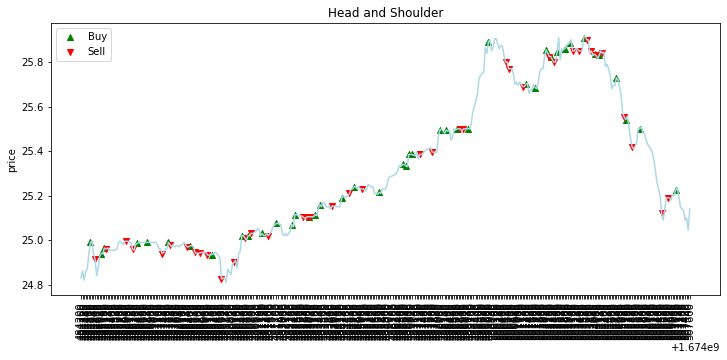

In [109]:

plt.figure(figsize=(12, 5))
plt.plot(time,price,color='lightblue')
plt.scatter(Buyx,Buyy, marker = '^',color='green',label='Buy')
plt.scatter(Sellx,Selly, marker = 'v',color='red',label='Sell')
plt.ylabel("price")
plt.xticks(time,rotation='vertical')
plt.legend(loc="upper left")
plt.title("Head and Shoulder")
plt.show()

In [104]:
def detect_double_top_bottom(df, window=3, threshold=0.05):
    
    roll_window = window
   
    range_threshold = threshold

    
    df['high_roll_max'] = df['High'].rolling(window=roll_window).max()
    df['low_roll_min'] = df['Low'].rolling(window=roll_window).min()

    
    mask_double_top = (df['high_roll_max'] >= df['High'].shift(1)) & (df['high_roll_max'] >= df['High'].shift(-1)) & (df['High'] < df['High'].shift(1)) & (df['High'] < df['High'].shift(-1)) & ((df['High'].shift(1) - df['Low'].shift(1)) <= range_threshold * (df['High'].shift(1) + df['Low'].shift(1))/2) & ((df['High'].shift(-1) - df['Low'].shift(-1)) <= range_threshold * (df['High'].shift(-1) + df['Low'].shift(-1))/2)
    
    mask_double_bottom = (df['low_roll_min'] <= df['Low'].shift(1)) & (df['low_roll_min'] <= df['Low'].shift(-1)) & (df['Low'] > df['Low'].shift(1)) & (df['Low'] > df['Low'].shift(-1)) & ((df['High'].shift(1) - df['Low'].shift(1)) <= range_threshold * (df['High'].shift(1) + df['Low'].shift(1))/2) & ((df['High'].shift(-1) - df['Low'].shift(-1)) <= range_threshold * (df['High'].shift(-1) + df['Low'].shift(-1))/2)

    
    df['double_pattern'] = np.nan
    df.loc[mask_double_top, 'double_pattern'] = 'double top'
    df.loc[mask_double_bottom, 'double_pattern'] = 'double bottom'

    return df

In [105]:
dtb=detect_double_top_bottom(df)
dtb.head(10)

,Datetime,Open,High,Low,Close,Adj Close,Volume,high_roll_max,low_roll_min,head_shoulder_pattern,double_pattern
0,2023-01-23 09:30:00-05:00,24.830000,24.959999,24.830000,24.889999,24.889999,94758,NaN,NaN,NaN,NaN
1,2023-01-23 09:31:00-05:00,24.861601,24.889999,24.799999,24.799999,24.799999,11249,NaN,NaN,NaN,NaN
2,2023-01-23 09:32:00-05:00,24.820000,24.850000,24.809999,24.842899,24.842899,4583,24.959999,24.799999,Head and Shoulder,double top
3,2023-01-23 09:33:00-05:00,24.860001,24.870001,24.847799,24.870001,24.870001,1006,24.889999,24.799999,NaN,NaN
4,2023-01-23 09:34:00-05:00,24.870001,24.950001,24.850000,24.934999,24.934999,1840,24.950001,24.809999,NaN,NaN
5,2023-01-23 09:35:00-05:00,24.934999,25.010000,24.934999,25.000000,25.000000,9508,25.010000,24.847799,NaN,NaN
6,2023-01-23 09:36:00-05:00,25.010000,25.010000,24.990000,24.990000,24.990000,11216,25.010000,24.850000,Inverse Head and Shoulder,double bottom
7,2023-01-23 09:37:00-05:00,24.995001,24.995001,24.920000,24.930000,24.930000,7837,25.010000,24.920000,NaN,NaN
8,2023-01-23 09:38:00-05:00,24.940001,24.940001,24.915001,24.915001,24.915001,2904,25.010000,24.915001,NaN,NaN
9,2023-01-23 09:39:00-05:00,24.915001,24.915001,24.837500,24.840000,24.840000,12294,24.995001,24.837500,Head and Shoulder,double top


generate_signal by double top and bottom

In [106]:
generate_signal=[[]]
buy=0
sell=0
time=[]
Buyy=[]
Buyx=[]
Selly=[]
Sellx=[]
price=[]
i=0
for row in hd.itertuples():
    if(row.double_pattern=='double top' and buy>0):
      signal=[]
      t=(row.Datetime)
      s = t.timestamp()
      time.append(s)
      signal.append( t.strftime('%m/%d/%Y,%H:%M:%S'))
      Selly.append(row.High)
      Sellx.append(s)
      signal.append("sell")
      price.append(row.High)
      signal.append(row.High)
      sell=sell+1
      generate_signal.append(signal)
      
    elif(row.double_pattern=='double bottom'):
      signal=[]
      t=(row.Datetime)
      s = t.timestamp()
      time.append(s)
      signal.append(t.strftime('%m/%d/%Y,%H:%M:%S'))
      Buyy.append(row.Low)
      Buyx.append(s)
      signal.append("buy")
      price.append(row.Low)
      signal.append(row.Low)
      buy=buy+1
      generate_signal.append(signal)
    else:
      signal=[]
      t=(row.Datetime)

      s = t.timestamp()
      time.append(s)
      
      signal.append(t.strftime('%m/%d/%Y,%H:%M:%S'))
      signal.append("none")
      price.append(row.Open)
      signal.append(row.Open)
      generate_signal.append(signal)
    i=i+1

generate_signal

[[],
 ['01/23/2023,09:30:00', 'none', 24.829999923706055],
 ['01/23/2023,09:31:00', 'none', 24.861600875854492],
 ['01/23/2023,09:32:00', 'none', 24.81999969482422],
 ['01/23/2023,09:33:00', 'none', 24.860000610351562],
 ['01/23/2023,09:34:00', 'none', 24.8700008392334],
 ['01/23/2023,09:35:00', 'none', 24.934999465942383],
 ['01/23/2023,09:36:00', 'buy', 24.989999771118164],
 ['01/23/2023,09:37:00', 'none', 24.9950008392334],
 ['01/23/2023,09:38:00', 'none', 24.940000534057617],
 ['01/23/2023,09:39:00', 'sell', 24.915000915527344],
 ['01/23/2023,09:40:00', 'none', 24.84000015258789],
 ['01/23/2023,09:41:00', 'none', 24.875],
 ['01/23/2023,09:42:00', 'none', 24.93000030517578],
 ['01/23/2023,09:43:00', 'buy', 24.940000534057617],
 ['01/23/2023,09:44:00', 'none', 24.940000534057617],
 ['01/23/2023,09:45:00', 'buy', 24.96500015258789],
 ['01/23/2023,09:46:00', 'sell', 24.959999084472656],
 ['01/23/2023,09:47:00', 'none', 24.96500015258789],
 ['01/23/2023,09:48:00', 'none', 24.95499992370

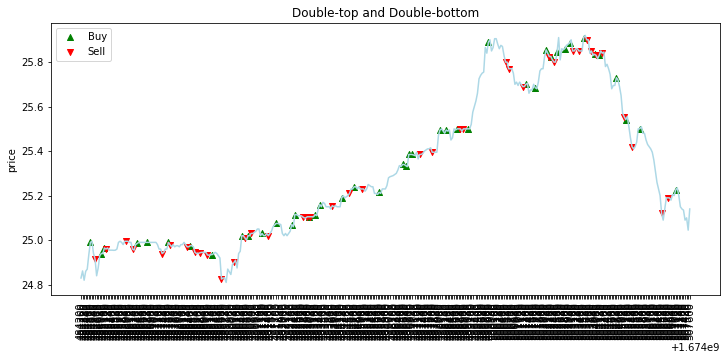

In [108]:
plt.figure(figsize=(12, 5))
plt.plot(time,price,color='lightblue')
plt.scatter(Buyx,Buyy, marker = '^',color='green',label='Buy')
plt.scatter(Sellx,Selly, marker = 'v',color='red',label='Sell')
# plt.xlabel("time",rotation=0)
plt.ylabel("price")
plt.xticks(time,rotation='vertical')
plt.legend(loc="upper left")
plt.title("Double-top and Double-bottom")
plt.show()